In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

/Users/bhupendrasinhthakre/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)


In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

names = ['sepal-length','sepal-width','petal-length','petal-width','Class']

dataset = pd.read_csv(url,names=names)

In [5]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.shape

(150, 5)

In [7]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,4].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)

In [12]:
# Scaling since it is based on Euclidean Distance

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [15]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
from sklearn.neighbors import KNeighborsClassifier
# With 5 nearest neighbors
classifier = KNeighborsClassifier(n_neighbors=5)
# fitting the X_train to y_train
classifier.fit(X_train,y_train)
#Makiing predictions
y_pred = classifier.predict(X_test)

In [34]:
# Creating confusion matrix since this is a classification algorithm 
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n\n')
print("Next Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Confusion Matrix


[[11  0  0]
 [ 0 11  0]
 [ 0  2  6]]



Next Classification Report


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.75      0.86         8

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.92      0.92        30
   weighted avg       0.94      0.93      0.93        30



In [36]:
classifier = KNeighborsClassifier(n_neighbors=1)
# fitting the X_train to y_train
classifier.fit(X_train,y_train)
#Makiing predictions
y_pred = classifier.predict(X_test)

In [37]:
# Creating confusion matrix since this is a classification algorithm 
from sklearn.metrics import classification_report, confusion_matrix
print("Confusion Matrix")
print('\n')
print(confusion_matrix(y_test,y_pred))
print('\n\n')
print("Next Classification Report")
print('\n')
print(classification_report(y_test,y_pred))

Confusion Matrix


[[11  0  0]
 [ 0 11  0]
 [ 0  2  6]]



Next Classification Report


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.75      0.86         8

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.92      0.92        30
   weighted avg       0.94      0.93      0.93        30



                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.85      1.00      0.92        11
 Iris-virginica       1.00      0.75      0.86         8

      micro avg       0.93      0.93      0.93        30
      macro avg       0.95      0.92      0.92        30
   weighted avg       0.94      0.93      0.93        30



In [26]:
# Let's make the "elbow" chart to see the optimal number of neighbor

In [27]:
error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

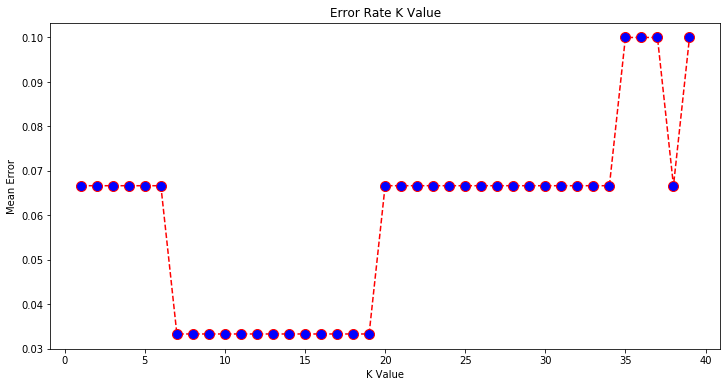

In [29]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title("Error Rate K Value")
plt.xlabel('K Value')
plt.ylabel('Mean Error')

# On Wine Dataset

In [38]:
from sklearn import datasets

/Users/bhupendrasinhthakre/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [39]:
wine = datasets.load_wine()

In [44]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [45]:
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [46]:
print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [47]:
print(wine.target[0:5])

[0 0 0 0 0]


In [48]:
wine.data.shape

(178, 13)

In [49]:
wine.target.shape

(178,)

In [50]:
# Splitting the dataset 

In [51]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [52]:
X_train, X_test, y_train, y_test = train_test_split(wine.data,wine.target, test_size=0.3)

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7592592592592593


In [63]:
accuracy = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Accuracy')

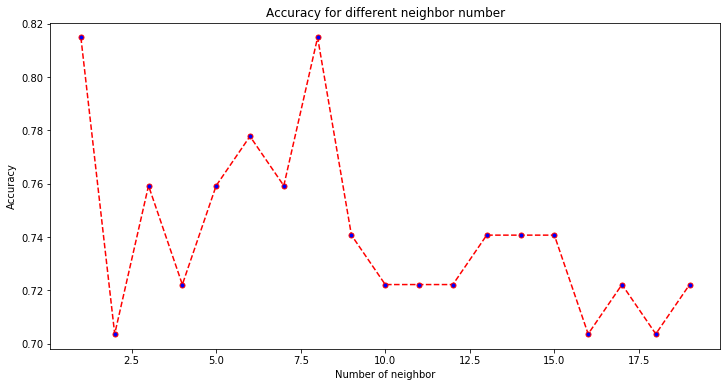

In [66]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),accuracy,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=5)
plt.title("Accuracy for different neighbor number")
plt.xlabel('Number of neighbor')
plt.ylabel('Accuracy')

Accuracy: 0.7592592592592593
